In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [3]:
data = pd.read_csv("../Data/Cleaned_Data.csv")

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler ()
scaled_features = scaler.fit_transform(data)

##### Applying Principal Component Analysis (PCA)

In [5]:
from sklearn.decomposition import PCA
X = scaled_features
pca = PCA ()
pca.fit_transform (X) 

array([[-1.68652011e+00, -1.08897397e+00,  4.59313647e-01, ...,
         1.45677308e-01,  4.81202320e-02, -1.61715267e-04],
       [-1.15033350e+00,  2.48779039e+00,  6.22041926e-01, ...,
        -5.42880974e-01, -8.41231518e-02,  5.99956149e-06],
       [ 9.61780897e-01, -3.93431732e-01,  3.95773231e-02, ...,
         2.19957849e-01,  5.11706921e-01,  2.15339363e-05],
       ...,
       [-9.27314679e-01, -1.82064530e+00, -3.83915640e-01, ...,
         4.63255655e-01,  1.57909541e-01, -1.65080562e-04],
       [-2.34342474e+00, -6.78618662e-01,  1.03355895e+00, ...,
         2.73975085e-01, -1.92003894e-01, -8.28524271e-05],
       [-5.73037773e-01, -4.21659120e-01,  1.10376367e+00, ...,
        -4.08792509e-01,  3.57802974e-01, -7.98824941e-05]])

In [6]:
pca.explained_variance_ratio_

array([2.73469621e-01, 2.03016264e-01, 8.86653764e-02, 7.50886210e-02,
       6.21575061e-02, 5.73047055e-02, 4.89631816e-02, 4.28095131e-02,
       3.73519990e-02, 3.06991871e-02, 2.36544887e-02, 1.77434349e-02,
       1.42852732e-02, 1.19693172e-02, 1.01358861e-02, 2.68493958e-03,
       6.85996553e-07])

In [7]:
pca.explained_variance_ratio_.shape

(17,)

Text(0, 0.5, 'Percentage of Explained Variance Ratio')

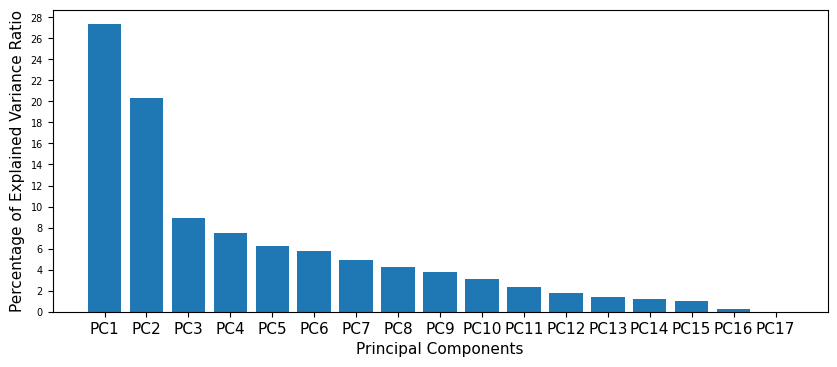

In [8]:
from matplotlib import pyplot as plt
pca.explained_variance_
pca.explained_variance_ratio_

plt.figure (figsize = (10 , 4), dpi = 100) 

plt.bar(range (17),(pca.explained_variance_ratio_)*100,tick_label=["PC" + str(x) for x in range(1,18)])

plt.xticks (fontsize = 11)
plt.yticks (range (0 , 30 , 2) , fontsize=7)

plt.xlabel('Principal Components' , size = 11)
plt.ylabel('Percentage of Explained Variance Ratio', size = 11)

**PCA with 2 dimensions**

In [9]:
from sklearn.decomposition import PCA
X = scaled_features
pca_2 = PCA (n_components = 2)
pca_2.fit_transform (X)

array([[-1.68651854, -1.08897315],
       [-1.15032831,  2.48779475],
       [ 0.96178471, -0.3934478 ],
       ...,
       [-0.92731578, -1.82064359],
       [-2.34342824, -0.6786139 ],
       [-0.57304159, -0.42166297]])

<BarContainer object of 2 artists>

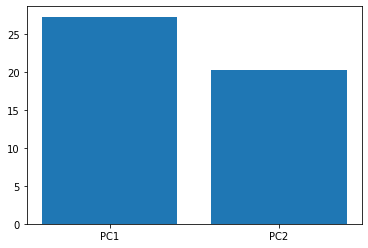

In [10]:
from matplotlib import pyplot as plt
pca_2.explained_variance_
pca_2.explained_variance_ratio_
plt.bar (range (2) , (pca_2.explained_variance_ratio_)*100 , tick_label = ["PC" + str(x) for x in range(1 , 3)])

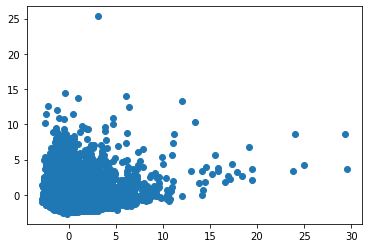

In [11]:
from matplotlib import pyplot as plt
pca_2.explained_variance_
pca_2.explained_variance_ratio_
Z = pca_2.transform (X)
Z.shape 
plt.scatter (Z [: , 0] , Z [: , 1])

In [12]:
pca_2 = pca_2.fit_transform (X)

In [13]:
pca_2.shape

(8876, 2)

In [14]:
pca_2_df = pd.DataFrame(pca_2) 
pca_2_df.columns = ["PC1" , "PC2"]
pca_2_df

,PC1,PC2
0,-1.686521,-1.088967
1,-1.150345,2.487871
2,0.961799,-0.393526
3,-0.913553,-0.036990
4,-1.600297,-0.699554
...,...,...
8871,-1.128783,-0.870742
8872,-0.357142,-2.022958
8873,-0.927310,-1.820674
8874,-2.343430,-0.678601


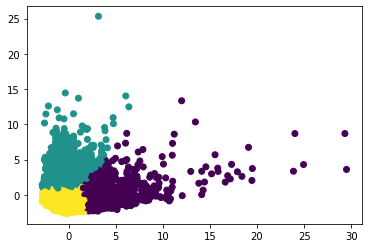

In [15]:
from sklearn.cluster import KMeans

plt.scatter (pca_2_df ["PC1"] , pca_2_df ["PC2"],
            c = KMeans(n_clusters = 3).fit_predict (pca_2_df) , cmap = None) 
plt.show ()

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

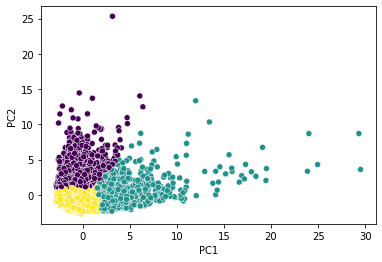

In [16]:
import seaborn as sns
sns.scatterplot (x="PC1" , y="PC2",
            c = KMeans (n_clusters = 3).fit_predict (pca_2_df), cmap = None, data=pca_2_df) 

**PCA with 3 dimensions**

In [17]:
pca_3 = PCA (n_components = 3).fit (X)


pca_3 = pca_3.fit_transform (X)

In [18]:
pca_3_df = pd.DataFrame (pca_3) 
pca_3_df.columns = ["PC1" , "PC2" , "PC3"]
pca_3_df.head()

,PC1,PC2,PC3
0,-1.686519,-1.088973,0.459371
1,-1.150333,2.487791,0.622079
2,0.961782,-0.393429,0.039673
3,-0.913553,-0.036993,1.534006
4,-1.600294,-0.699564,0.295308


In [21]:
import plotly.express as px

fig = px.scatter_3d (pca_3_df, x='PC1' , y = 'PC2', z = 'PC3',
                    color = KMeans (n_clusters = 3).fit_predict (pca_3_df)) 
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

**Finding the number of components for PCA**

Text(9, 0.7, 'number of components: 8')

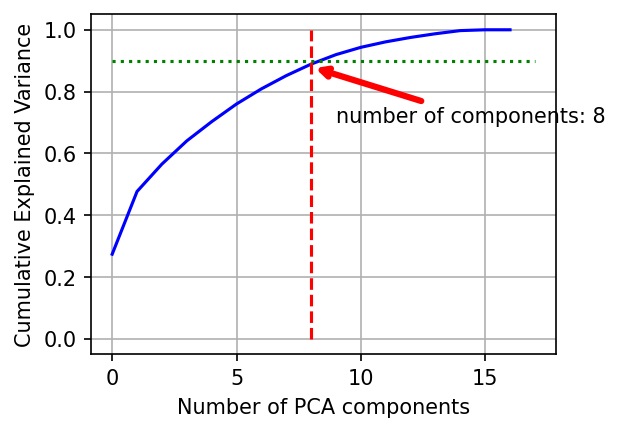

In [22]:
fig = plt.figure (figsize = (4 , 3) , dpi = 150)

plt.plot (np.cumsum (pca.explained_variance_ratio_) , color = "blue")
plt.vlines (x = 8 , ymax = 1 , ymin = 0 , colors = "red", linestyles = '--')
plt.hlines (y = 0.9 , xmax = 17 , xmin = 0 , colors = "green" , linestyles = ":")

plt.xlabel ('Number of PCA components' , fontsize = 10)
plt.ylabel ('Cumulative Explained Variance' , fontsize = 10)

plt.grid (True)
plt.annotate ('number of components: 8',
             xy = (8 , 0.88),
             xytext = (9 , 0.7),
             arrowprops = dict (arrowstyle = '->' , connectionstyle = 'arc3' , color = 'red', lw = 3))

**PCA with 8 dimensions**

In [23]:
pca = PCA (n_components = 8)
pca.fit (X)
pca_transform = pca.transform (X)
selected_pca = pca_transform [:,:8]

In [24]:
pca_8 = PCA (n_components = 8).fit (X)

pca_8 = pca_8.fit_transform (X)

In [25]:
pca_8_df = pd.DataFrame (pca_8) 
pca_8_df.columns = ["PC1" , "PC2" , "PC3", "PC4", "PC5", "PC6" , "PC7" , "PC8"]
pca_8_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-1.686520,-1.088974,0.459314,0.697222,0.064202,0.082937,0.822029,-0.057782
1,-1.150334,2.487790,0.622042,-0.097306,0.713320,-1.065487,-0.344879,0.126617
2,0.961781,-0.393432,0.039577,1.276283,-2.107230,-0.412936,-1.592978,-0.094950
3,-0.913554,-0.036995,1.533938,1.058203,0.214211,-0.196015,-0.224845,-0.775408
4,-1.600294,-0.699565,0.295257,1.045982,-0.426078,0.077209,0.706174,0.184979


In [26]:
data.shape

(8876, 17)

In [27]:
pca_8_df.shape

(8876, 8)

In [28]:
sf = pd.DataFrame(scaled_features)
sf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.736905,-0.287766,-0.426040,-0.357926,-0.349910,-0.468992,-0.806206,-0.681576,-0.705852,-0.678664,-0.478306,-0.512413,-0.961640,-0.531938,-0.299201,-0.528346,0.359995
1,0.779306,0.113037,-0.470533,-0.357926,-0.455019,2.593303,-1.221417,-0.681576,-0.915619,0.567547,0.105923,-0.592596,0.684124,0.820499,0.098709,0.229157,0.359995
2,0.440093,0.513839,-0.109937,0.106237,-0.455019,-0.468992,1.269844,2.662996,-0.915619,-0.678664,-0.478306,-0.111498,0.821271,-0.386245,-0.091135,-0.528346,0.359995
3,0.042775,-1.089371,0.228579,0.541981,-0.455019,-0.371182,-1.013812,-0.402863,-0.915619,-0.263262,-0.332249,-0.552505,0.821271,-0.601897,-0.358710,-0.528346,0.359995
4,-0.364364,0.513839,-0.463071,-0.348321,-0.455019,-0.468992,-1.013812,-0.402863,-0.915619,-0.678664,-0.478306,-0.552505,-0.906781,-0.366739,-0.254292,-0.528346,0.359995


In [29]:
pca_8_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-1.686520,-1.088974,0.459314,0.697222,0.064202,0.082937,0.822029,-0.057782
1,-1.150334,2.487790,0.622042,-0.097306,0.713320,-1.065487,-0.344879,0.126617
2,0.961781,-0.393432,0.039577,1.276283,-2.107230,-0.412936,-1.592978,-0.094950
3,-0.913554,-0.036995,1.533938,1.058203,0.214211,-0.196015,-0.224845,-0.775408
4,-1.600294,-0.699565,0.295257,1.045982,-0.426078,0.077209,0.706174,0.184979


In [30]:
from sklearn.cluster import KMeans
kmeans = KMeans (n_clusters = 4)
kmeans = kmeans.fit (pca_8_df)

centroids = kmeans.cluster_centers_
print (centroids)

clusters = kmeans.labels_
print (clusters)

[[-1.20304651 -0.37983331  0.44043885 -1.59162028 -0.04858207  2.19637976
  -0.93914486 -0.23032472]
 [ 3.89670828 -0.17067983  0.10250328  0.11004678 -0.29799718 -0.01038735
  -0.16625846 -0.04330724]
 [-0.65308492  3.17831378 -0.30435936 -0.21805895  0.05215121 -0.35153381
  -0.10423586  0.06936239]
 [-0.53432264 -0.70884318 -0.00447805  0.24082609  0.05889071 -0.19992222
   0.18682489  0.02258413]]
[3 2 3 ... 0 0 0]


In [32]:
pca_8_df_with_clusters = pca_8_df.copy()
pca_8_df_with_clusters['Clusters'] = kmeans.labels_
pca_8_df_with_clusters

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Clusters
0,-1.686520,-1.088974,0.459314,0.697222,0.064202,0.082937,0.822029,-0.057782,3
1,-1.150334,2.487790,0.622042,-0.097306,0.713320,-1.065487,-0.344879,0.126617,2
2,0.961781,-0.393432,0.039577,1.276283,-2.107230,-0.412936,-1.592978,-0.094950,3
3,-0.913554,-0.036995,1.533938,1.058203,0.214211,-0.196015,-0.224845,-0.775408,3
4,-1.600294,-0.699565,0.295257,1.045982,-0.426078,0.077209,0.706174,0.184979,3
...,...,...,...,...,...,...,...,...,...
8871,-1.128798,-0.870673,1.274826,-1.028105,-0.863815,3.285747,-1.732614,-0.572135,0
8872,-0.357144,-2.022940,-0.903782,-2.772226,0.019370,2.684563,-1.538019,0.196791,0
8873,-0.927315,-1.820645,-0.383916,-2.321573,0.116568,2.992822,-1.405571,-0.334831,0
8874,-2.343425,-0.678619,1.033559,-1.812556,-0.181767,3.194405,-0.957038,0.131492,0


<AxesSubplot:xlabel='Clusters', ylabel='count'>

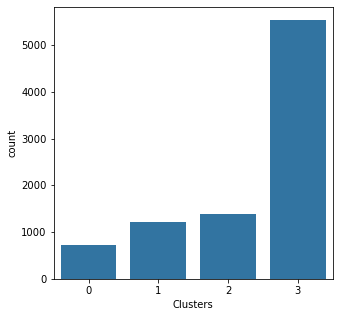

In [33]:
plt.figure (figsize = (5 , 5))
sns.countplot (x=pca_8_df_with_clusters["Clusters"])

In [34]:
pca_8_df_with_clusters.to_csv('../Data/PCA_Clusters.csv')